In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r"E:\DATA ANALYST\Pandas\Social Media Screen Time Analysis\screentime_analysis.csv")

In [8]:
data

,Date,App,Usage (minutes),Notifications,Times Opened
0,8/7/2024,Instagram,81,24,57
1,8/8/2024,Instagram,90,30,53
2,8/26/2024,Instagram,112,33,17
3,8/22/2024,Instagram,82,11,38
4,8/12/2024,Instagram,59,47,16
...,...,...,...,...,...
195,8/10/2024,LinkedIn,22,12,5
196,8/23/2024,LinkedIn,5,7,1
197,8/18/2024,LinkedIn,19,2,5
198,8/26/2024,LinkedIn,21,14,1


In [10]:
print(data.isnull().sum())

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64


In [12]:
data.dropna(inplace=True)

In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data['Usage (minutes)'] = pd.to_numeric(data['Usage (minutes)'], errors='coerce')
data['Notifications'] = pd.to_numeric(data['Notifications'], errors='coerce')
data['Times Opened'] = pd.to_numeric(data['Times Opened'], errors='coerce')


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


In [26]:
data.describe()

,Date,Usage (minutes),Notifications,Times Opened
count,200,200.000000,200.000000,200.00000
mean,2024-08-16 17:16:48,37.750000,28.735000,21.63000
min,2024-08-01 00:00:00,1.000000,0.000000,1.00000
25%,2024-08-09 00:00:00,17.000000,1.750000,4.00000
50%,2024-08-18 00:00:00,26.000000,11.500000,10.00000
75%,2024-08-25 00:00:00,51.250000,47.000000,32.00000
max,2024-08-30 00:00:00,119.000000,147.000000,99.00000
std,NaN,29.711299,35.801726,24.27301


# Total Usage Per App

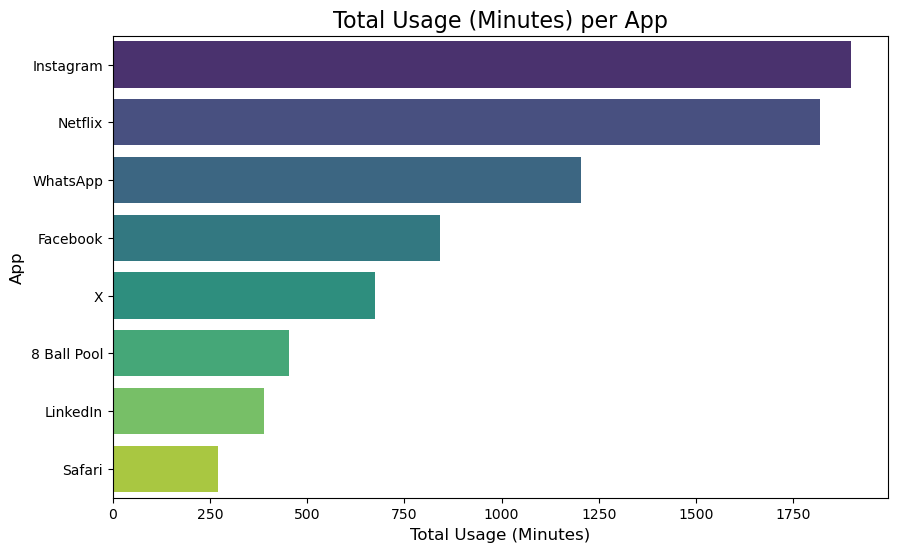

In [33]:
plt.figure(figsize=(10,6))
total_usage = data.groupby('App')['Usage (minutes)'].sum().sort_values(ascending= False)
sns.barplot(x=total_usage.values,y=total_usage.index,palette='viridis')
plt.title('Total Usage (Minutes) per App', fontsize=16)
plt.xlabel('Total Usage (Minutes)', fontsize=12)
plt.ylabel('App', fontsize=12)
plt.show()

# Average Notifications per App

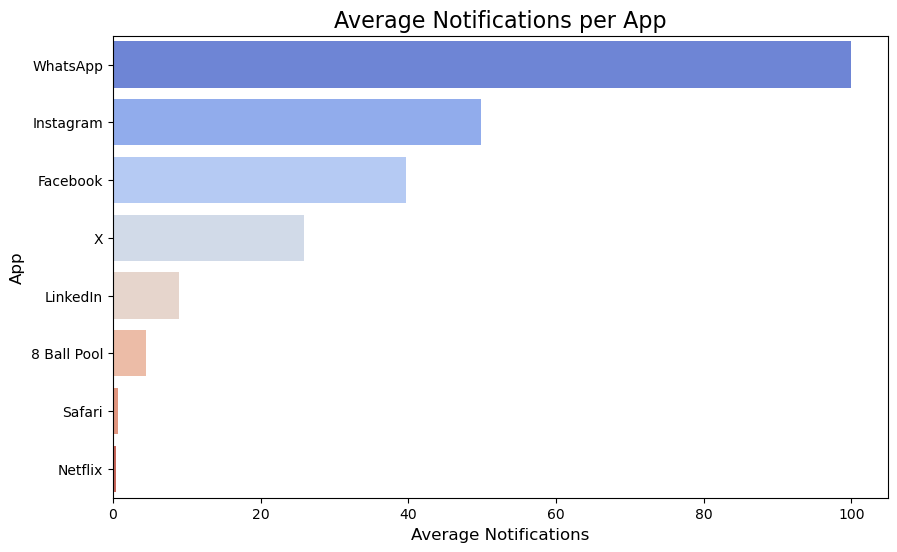

In [38]:
plt.figure(figsize=(10,6))
avg_notifications = data.groupby('App')['Notifications'].mean().sort_values(ascending=False)
sns.barplot(x=avg_notifications.values, y=avg_notifications.index, palette='coolwarm')
plt.title('Average Notifications per App', fontsize=16)
plt.xlabel('Average Notifications', fontsize=12)
plt.ylabel('App', fontsize=12)
plt.show()

# Daily Usage Trend

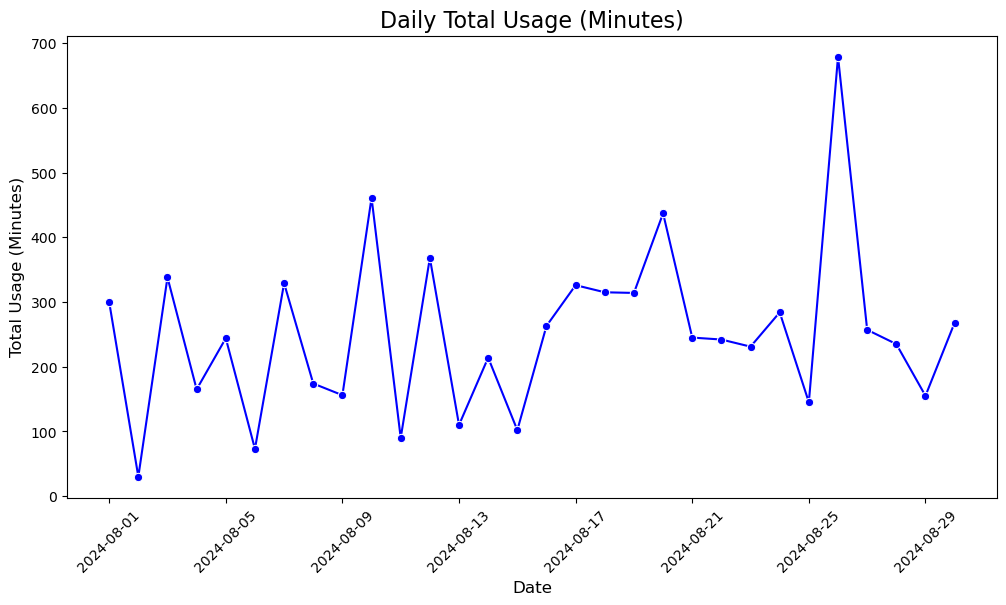

In [43]:
plt.figure(figsize=(12, 6))
daily_usage = data.groupby('Date')['Usage (minutes)'].sum()
sns.lineplot(x=daily_usage.index, y=daily_usage.values, marker='o', color='b')
plt.title('Daily Total Usage (Minutes)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Usage (Minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Distribution of Usage Time

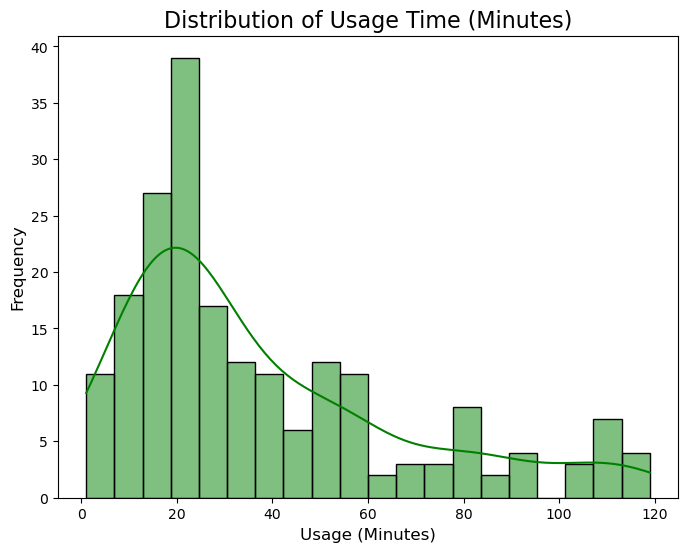

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Usage (minutes)'], kde=True, bins=20, color='green')
plt.title('Distribution of Usage Time (Minutes)', fontsize=16)
plt.xlabel('Usage (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Correlation Heatmap

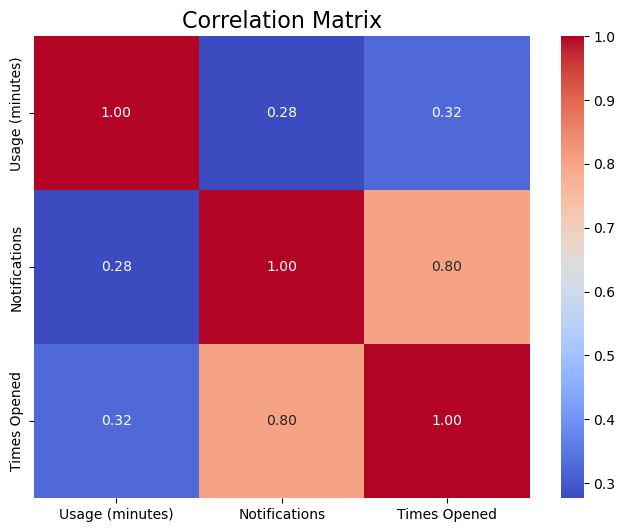

In [49]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Usage (minutes)', 'Notifications', 'Times Opened']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# App Openings vs Notifications

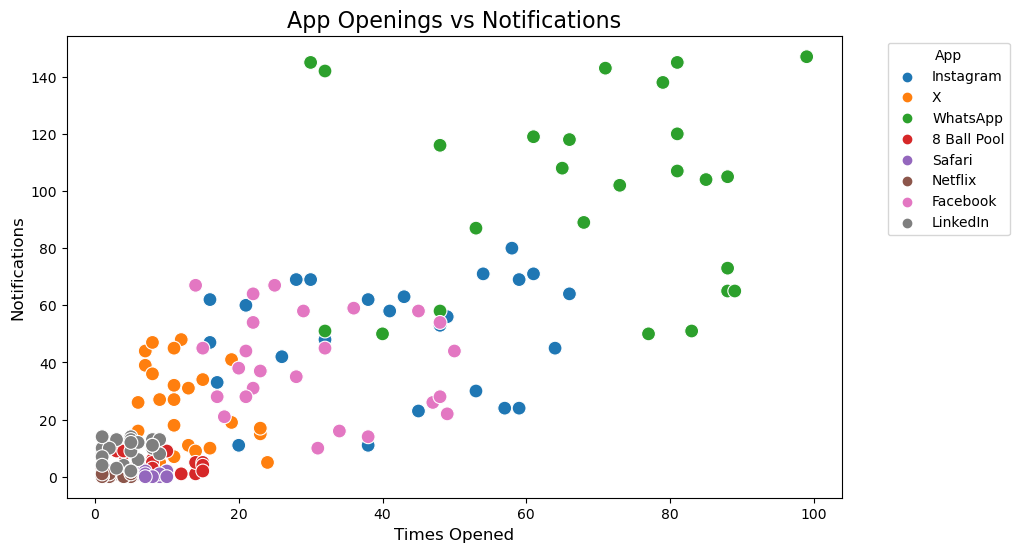

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Times Opened', y='Notifications', hue='App', palette='tab10', s=100)
plt.title('App Openings vs Notifications', fontsize=16)
plt.xlabel('Times Opened', fontsize=12)
plt.ylabel('Notifications', fontsize=12)
plt.legend(title='App', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()